# **Proyek Pertama: Predictive Analysis - Dicoding**

## Import Library

Pada tahap ini, berbagai library Python diimpor untuk mendukung proses analisis data, visualisasi, dan pemodelan machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

## Data Loading

Pada tahap ini, dataset diunduh dari Kaggle menggunakan fungsi kagglehub.dataset_download(). Perintah berikut digunakan untuk mendapatkan path lokasi file dataset yang telah terunduh:

Perintah path = kagglehub.dataset_download("bhavikjikadara/brand-laptops-dataset") akan secara otomatis mengunduh dataset Brand Laptops Dataset dari Kaggle dan menyimpan lokasinya ke dalam variabel path. Nilai path kemudian digunakan untuk memuat file CSV ke dalam DataFrame. Tahap ini memastikan dataset berhasil diambil dari sumber eksternal sebelum diproses lebih lanjut.

### Dataset

Dataset yang digunakan: **Brand Laptops Dataset** dari Kaggle.  
Sumber: Jikadara, B. (2024). *Brand Laptops Dataset*. Kaggle.

Diakses dari [https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset/data](https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset/data)

In [2]:
path = kagglehub.dataset_download("bhavikjikadara/brand-laptops-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brand-laptops-dataset' dataset.
Path to dataset files: /kaggle/input/brand-laptops-dataset


In [3]:
df = pd.read_csv(path + "/laptops.csv")
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


## Exploratory Data Analysis (EDA)

### Dataset Overview

Dataset Overview digunakan untuk memahami struktur dan karakteristik data sebelum melakukan proses prediksi harga laptop. Informasi yang ditampilkan meliputi:

* df.info() — memberikan ringkasan struktur dataset, jumlah kolom, jumlah nilai non-null, dan tipe data.

* df.describe() — menampilkan statistik deskriptif untuk kolom numerik seperti mean, median, dan standard deviation.

* df.shape — menunjukkan jumlah baris dan kolom dalam dataset.

* df.dtypes — menampilkan tipe data setiap kolom, membantu memahami karakteristik fitur.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [5]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


In [6]:
df.shape

(991, 22)

In [7]:
df.dtypes

,0
index,int64
brand,object
Model,object
Price,int64
Rating,int64
processor_brand,object
processor_tier,object
num_cores,int64
num_threads,int64
ram_memory,int64


### Data Cleaning

Pada tahap ini dilakukan pembersihan untuk memastikan dataset siap digunakan dalam analisis dan proses prediksi harga laptop. Dua langkah utama yang dilakukan adalah:

* df.columns = df.columns.str.lower()
  
  Mengubah semua nama kolom menjadi huruf kecil supaya penamaan kolom konsisten dan lebih mudah diakses saat eksplorasi, visualisasi, serta preprocessing.

* df = df.drop(columns=['index'])
  
  Menghapus kolom index, karena kolom tersebut tidak memiliki informasi apapun terkait harga laptop, bukan bagian dari fitur laptop seperti RAM, brand, processor, atau storage.

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df = df.drop(columns=['index'])

### Missing Value

In [10]:
df.isnull().sum()

,0
brand,0
model,0
price,0
rating,0
processor_brand,0
processor_tier,0
num_cores,0
num_threads,0
ram_memory,0
primary_storage_type,0


df.isnull().sum() digunakan untuk memeriksa apakah terdapat nilai kosong (missing values) di setiap kolom dataset. Hasil pemeriksaan menunjukkan bahwa dataset ini bersih dari data kosong.

### Handling Outlier

Outlier merupakan nilai ekstrem yang dapat memberikan pengaruh berlebihan terhadap hasil analisis dan pemodelan sehingga perlu ditangani. Dalam dataset ini, nilai ekstrem pada fitur seperti harga, kapasitas penyimpanan, RAM, dan spesifikasi hardware lainnya bukan merupakan anomali, melainkan variasi alami dari produk dengan spesifikasi yang beragam.

Oleh karena itu, outlier tidak dihapus, melainkan ditangani menggunakan metode **winsorization** agar pengaruh nilai ekstrem dapat dikurangi tanpa menghilangkan informasi penting dalam data.

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['price', 'rating', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_capacity', 'secondary_storage_capacity',
       'display_size', 'resolution_width', 'resolution_height'],
      dtype='object')

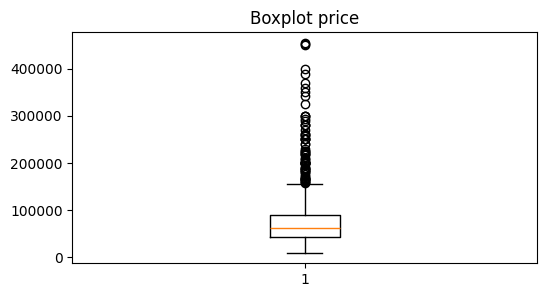

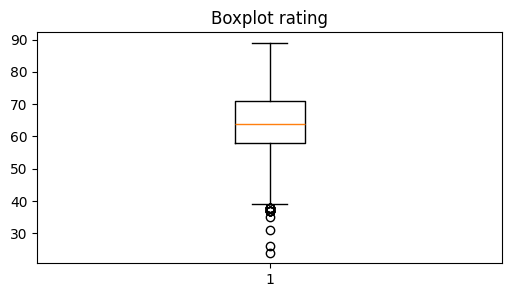

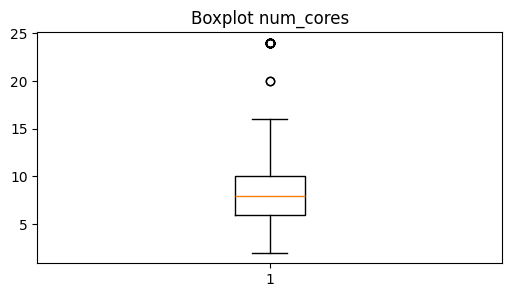

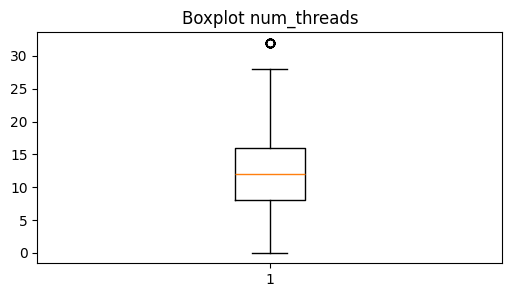

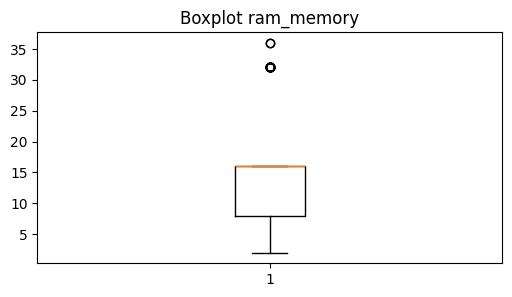

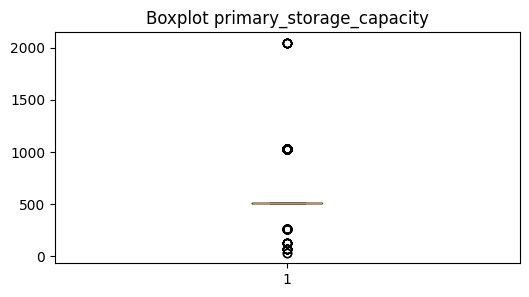

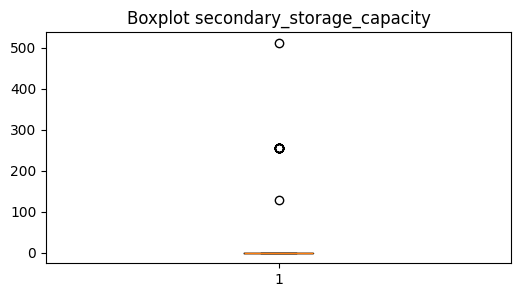

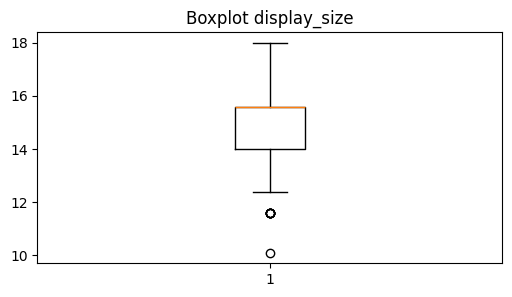

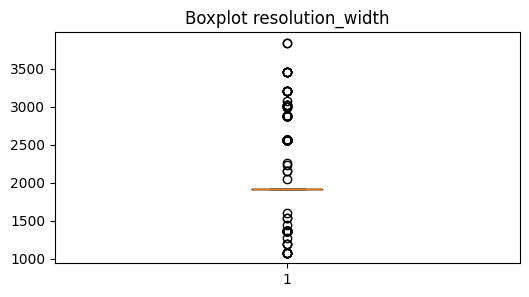

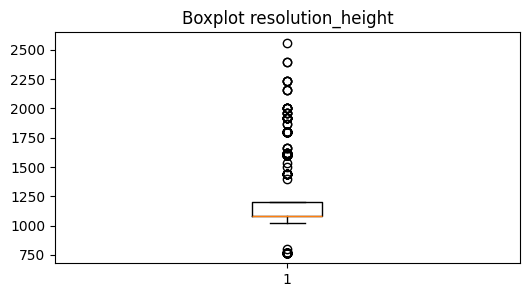

In [12]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

In [13]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Hitung outlier
outlier_mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()

outlier_count

,0
price,71
rating,19
num_cores,23
num_threads,20
ram_memory,38
primary_storage_capacity,283
secondary_storage_capacity,15
display_size,8
resolution_width,215
resolution_height,212


In [14]:
df_winsor = df.copy()

numeric_cols = df_winsor.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_winsor[col].quantile(0.25)
    Q3 = df_winsor[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization
    df_winsor[col] = np.where(df_winsor[col] < lower_bound, lower_bound,
                              np.where(df_winsor[col] > upper_bound, upper_bound,
                                       df_winsor[col]))

Penanganan outlier dilakukan menggunakan metode winsorization pada seluruh fitur numerik. Proses ini dimulai dengan mengidentifikasi kolom bertipe numerik, kemudian menentukan batas bawah dan batas atas nilai yang dianggap wajar berdasarkan sebaran data. Nilai yang berada di bawah batas bawah disesuaikan ke nilai batas tersebut, sementara nilai yang melebihi batas atas diturunkan ke nilai batas atas.

Pendekatan ini bertujuan untuk mengurangi pengaruh nilai ekstrem tanpa menghapus data, sehingga informasi penting dalam dataset tetap terjaga dan data menjadi lebih stabil untuk digunakan pada tahap analisis dan pemodelan selanjutnya.

In [15]:
df_clean = df_winsor

In [16]:
df_clean.shape

(991, 21)

In [17]:
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Hitung outlier
outlier_mask = (df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))
outlier_count = outlier_mask.sum()

outlier_count

,0
price,0
rating,0
num_cores,0
num_threads,0
ram_memory,0
primary_storage_capacity,0
secondary_storage_capacity,0
display_size,0
resolution_width,0
resolution_height,0


Setelah proses penanganan outlier dilakukan, data dievaluasi kembali dan hasilnya menunjukkan bahwa seluruh fitur numerik sudah tidak mengandung outlier. Dengan demikian, data dianggap bersih dan siap digunakan pada tahap preprocessing dan pemodelan selanjutnya.

### Univariate Analysis

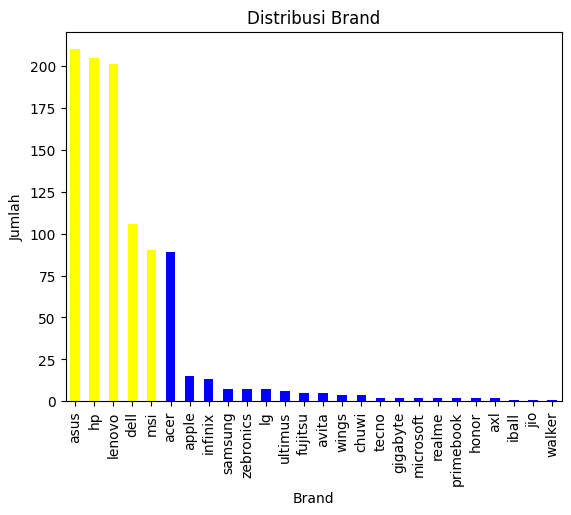

In [18]:
# 1. Distribusi Brand Laptop
# Hitung jumlah tiap brand
counts = df_clean['brand'].value_counts()

# Tentukan warna: 5 teratas kuning, sisanya biru
colors = ['yellow' if i < 5 else 'blue' for i in range(len(counts))]

counts.plot(kind='bar', color=colors)

plt.title('Distribusi Brand')
plt.xlabel('Brand')
plt.ylabel('Jumlah')
plt.show()

Dalam tahap univariate analysis, salah satu visualisasi yang dilakukan adalah melihat distribusi brand laptop. Hasilnya menunjukkan bahwa Asus menjadi brand dengan jumlah produk terbanyak, diikuti oleh HP, Lenovo, Dell, dan MSI.

Dengan mengetahui brand yang paling banyak muncul yang berarti brand tersebut lebih populer atau lebih mudah ditemukan di pasar, perusahaan dapat menentukan brand mana yang lebih praktis dan efisien untuk diprioritaskan dalam proses pengadaan karena ketersediaannya lebih terjamin dan proses pemenuhan kebutuhan barang dapat berjalan lebih cepat.

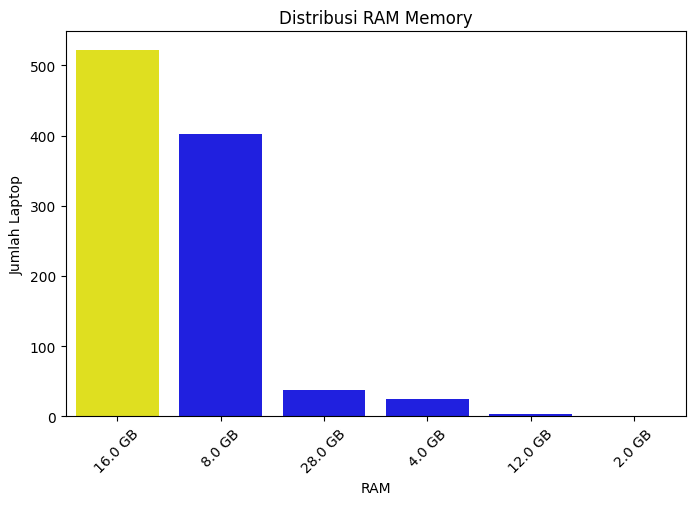

In [19]:
# 2. Distribusi RAM Memory Laptop
# Ubah RAM menjadi kategori string
df_clean['ram_memory_cat'] = df_clean['ram_memory'].astype(str) + " GB"

# Hitung jumlah tiap RAM
counts = df_clean['ram_memory_cat'].value_counts()

# Warna: kuning untuk tertinggi, biru untuk lainnya
colors = ['yellow' if v == counts.max() else 'blue' for v in counts]

plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=colors, legend=False)

plt.title("Distribusi RAM Memory")
plt.xlabel("RAM")
plt.ylabel("Jumlah Laptop")
plt.xticks(rotation=45)
plt.show()

Pada visualisasi berikutnya, distribusi RAM menunjukkan bahwa kapasitas yang paling banyak muncul adalah 16 GB, disusul oleh 8 GB dan 32 GB. RAM 16 GB umumnya sudah memberikan performa yang cepat dan nyaman untuk berbagai kebutuhan, namun harganya tetap lebih terjangkau dibandingkan laptop dengan RAM 32 GB.

Informasi ini membantu perusahaan menentukan spesifikasi RAM yang paling efisien dan tepat untuk diprioritaskan dalam pengadaan, karena memberikan keseimbangan terbaik antara performa dan biaya.

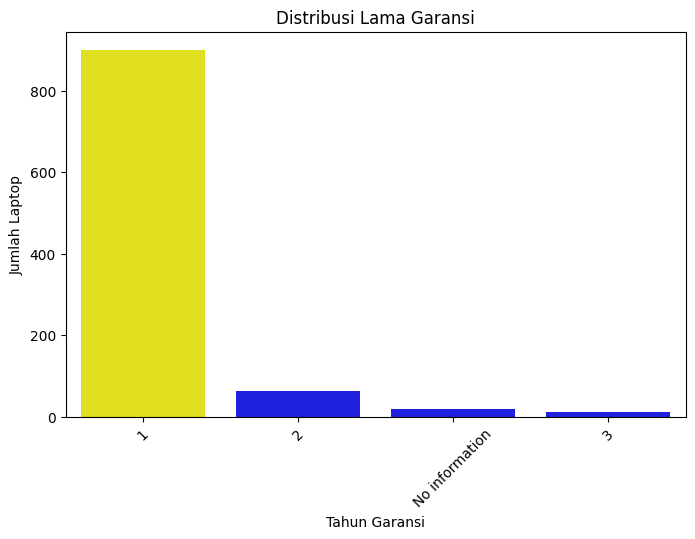

In [20]:
# 3. Distribusi Lama Garansi Laptop
# Hitung jumlah tiap kategori
counts = df_clean['year_of_warranty'].value_counts()

# Warna: kuning untuk tertinggi, biru untuk lainnya
colors = ['yellow' if v == counts.max() else 'blue' for v in counts]

plt.figure(figsize=(8,5))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=colors, legend=False)

plt.title("Distribusi Lama Garansi")
plt.xlabel("Tahun Garansi")
plt.ylabel("Jumlah Laptop")
plt.xticks(rotation=45)
plt.show()

Visualisasi lama garansi menunjukkan bahwa sebagian besar laptop memiliki garansi satu tahun, dan informasi ini membantu perusahaan mempertimbangkan apakah garansi standar tersebut sudah cukup untuk kebutuhan operasional atau perlu memilih vendor yang menawarkan garansi lebih panjang agar risiko dan biaya perbaikan bisa diminimalkan.

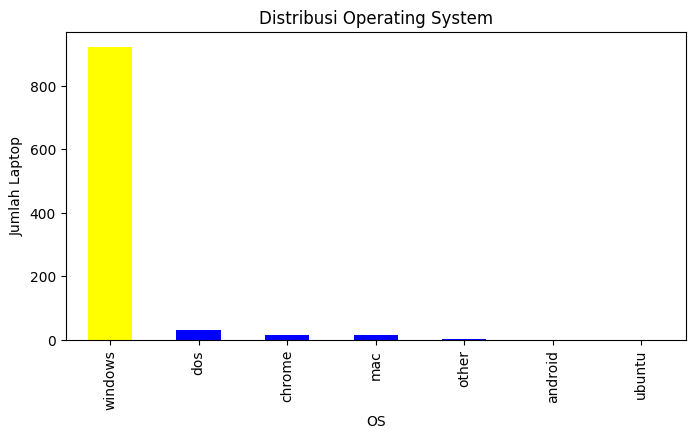

In [21]:
# 4. Distribusi Operating System Laptop
# Hitung jumlah tiap OS
counts = df_clean['os'].value_counts()

# Tentukan warna: kuning untuk tertinggi, biru untuk lainnya
colors = ['yellow' if v == counts.max() else 'blue' for v in counts]

plt.figure(figsize=(8,4))
counts.plot(kind='bar', color=colors)

plt.title("Distribusi Operating System")
plt.xlabel("OS")
plt.ylabel("Jumlah Laptop")
plt.show()

Dari visualisasi sistem operasi, terlihat bahwa Windows menjadi OS yang paling banyak muncul dan paling umum tersedia di pasaran, sehingga perusahaan dapat mempertimbangkannya sebagai pilihan utama dalam pengadaan karena ketersediaan lebih banyak.

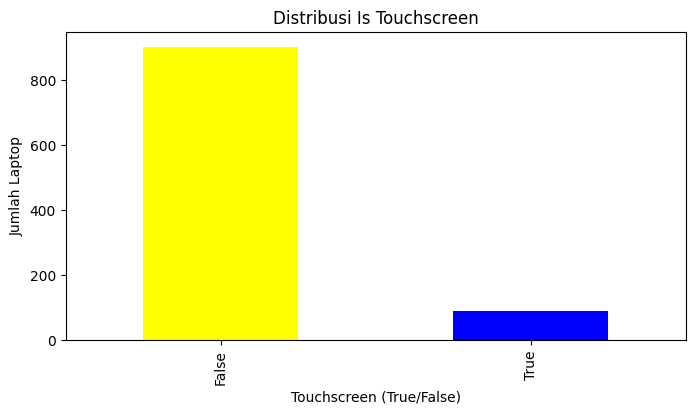

In [22]:
# 5. Distribusi Laptop Berdasarkan Layar Sentuh
# Hitung jumlah tiap kategori
counts = df_clean['is_touch_screen'].value_counts()

# Tentukan warna: kuning untuk tertinggi, biru untuk lainnya
colors = ['yellow' if v == counts.max() else 'blue' for v in counts]

plt.figure(figsize=(8,4))
counts.plot(kind='bar', color=colors)

plt.title("Distribusi Is Touchscreen")
plt.xlabel("Touchscreen (True/False)")
plt.ylabel("Jumlah Laptop")
plt.show()

Visualisasi fitur layar sentuh menunjukkan bahwa laptop tanpa layar sentuh jauh lebih banyak di pasaran, sehingga perusahaan dapat memprioritaskan pengadaan model non-touchscreen karena lebih mudah ditemukan dan umumnya memiliki harga yang lebih ekonomis.

### Multivariate Analysis

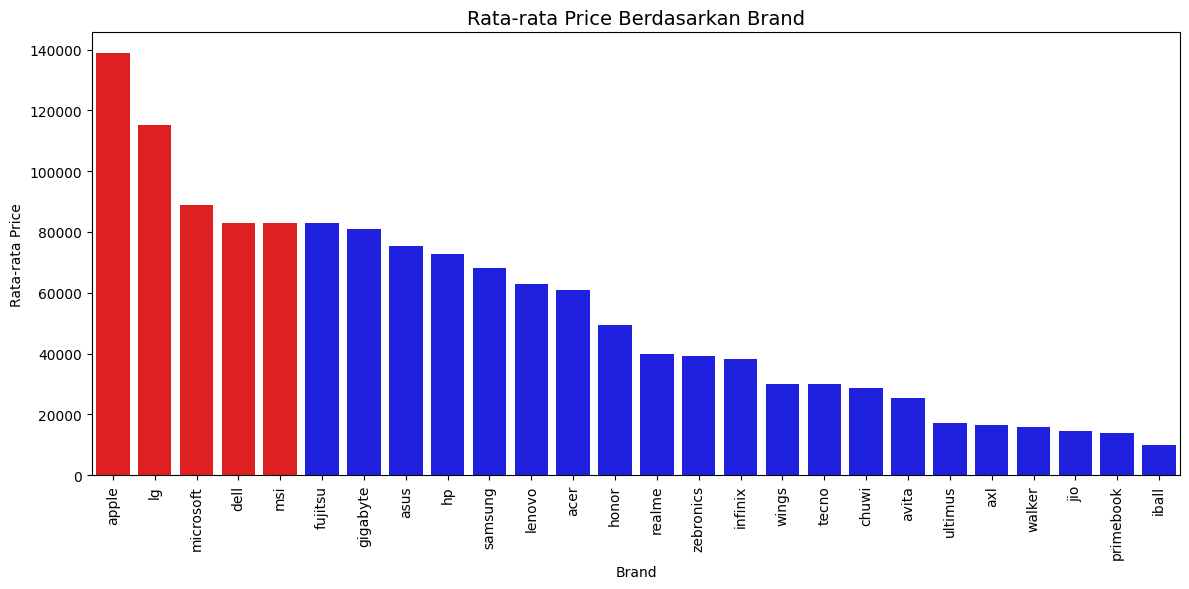

In [23]:
# 1. Rata-rata Harga (Price) berdasarkan Brand Laptop

# Hitung rata-rata price tiap brand dan urutkan descending
brand_price = df_clean.groupby('brand')['price'].mean().sort_values(ascending=False)

# 5 teratas berwarna Merah
colors = ['red' if i < 5 else 'blue' for i in range(len(brand_price))]

plt.figure(figsize=(12,6))
sns.barplot(x=brand_price.index, y=brand_price.values, hue=brand_price.index, palette=colors, legend=False)

plt.title("Rata-rata Price Berdasarkan Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Rata-rata Price")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi rata-rata harga per brand, terlihat bahwa Apple, LG, Microsoft, Dell, dan MSI berada pada kelompok brand dengan harga tertinggi.

Sementara itu, brand seperti Asus, HP, Samsung, Lenovo, dan Acer menawarkan harga yang lebih terjangkau, sehingga dapat menjadi pilihan yang lebih efisien bagi perusahaan dalam proses pengadaan.

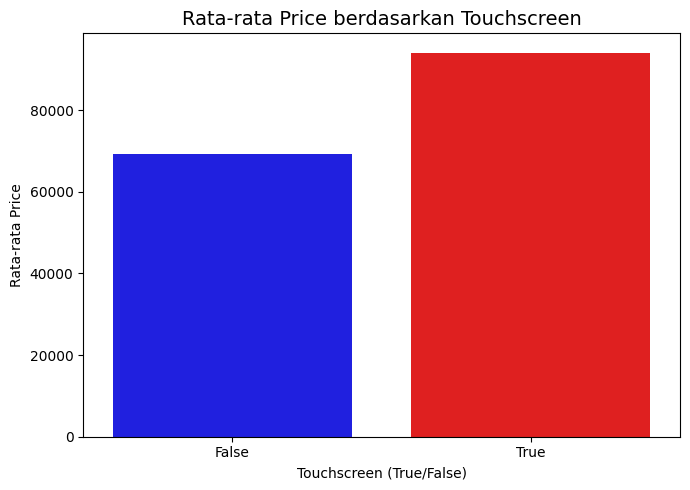

In [24]:
# 2. Rata-rata Harga (Price) berdasarkan Layar Sentuh Laptop

# Hitung rata-rata harga per kategori dan urutkan descending
touch_price = df_clean.groupby('is_touch_screen')['price'].mean().sort_values(ascending=False)

# Warna merah untuk tertinggi, biru untuk lainnya
colors = ['blue' if i == 0 else 'red' for i in range(len(touch_price))]

plt.figure(figsize=(7,5))
sns.barplot(x=touch_price.index, y=touch_price.values, hue=touch_price.index, palette=colors, legend=False)

plt.title("Rata-rata Price berdasarkan Touchscreen", fontsize=14)
plt.xlabel("Touchscreen (True/False)")
plt.ylabel("Rata-rata Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Visualisasi menunjukkan bahwa laptop dengan layar sentuh memiliki harga yang cenderung lebih tinggi dibandingkan laptop tanpa layar sentuh. Berdasarkan temuan ini, perusahaan dapat mempertimbangkan untuk memprioritaskan pembelian laptop non-touchscreen apabila fitur tersebut tidak menjadi kebutuhan utama, sehingga pengadaan dapat dilakukan dengan lebih efisien dan anggaran dapat dioptimalkan.

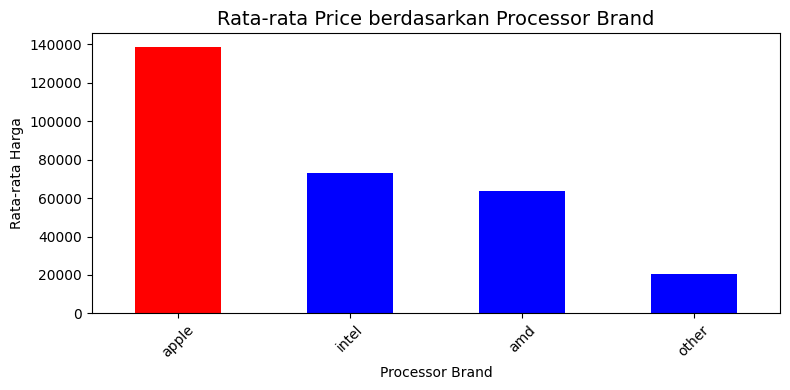

In [25]:
# 3. Rata-rata Harga (Price) berdasarkan Processor Brand Laptop

# Hitung rata-rata harga per processor brand dan urutkan descending
avg_price = df_clean.groupby('processor_brand')['price'].mean().sort_values(ascending=False)

# Warna merah untuk yang tertinggi, biru untuk lainnya
colors = ['red' if v == avg_price.max() else 'blue' for v in avg_price]

# Plot bar
plt.figure(figsize=(8,4))
avg_price.plot(kind='bar', color=colors)

plt.title("Rata-rata Price berdasarkan Processor Brand", fontsize=14)
plt.xlabel("Processor Brand")
plt.ylabel("Rata-rata Harga")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi processor brand menunjukkan bahwa tiga brand dengan harga rata-rata tertinggi adalah Apple, Intel, dan AMD, sementara brand lainnya berada dalam kategori “other” dengan harga yang lebih rendah.

Informasi ini membantu perusahaan menentukan prioritas spesifikasi prosesor saat pengadaan. Misalnya memilih Apple jika membutuhkan performa tinggi atau memilih kategori other jika ingin pengadaan yang lebih hemat dan sesuai batas anggaran.

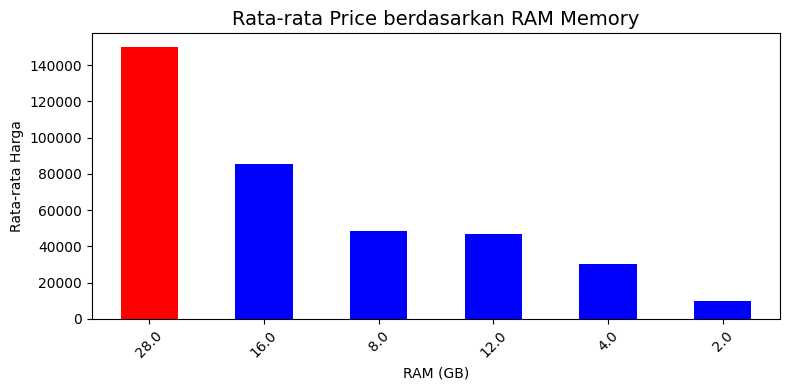

In [26]:
# 4. Rata-rata Harga (Price) berdasarkan RAM Memory Laptop

# Hitung rata-rata harga per RAM dan urutkan descending
avg_price = df_clean.groupby('ram_memory')['price'].mean().sort_values(ascending=False)

# Warna merah untuk yang tertinggi, biru untuk lainnya
colors = ['red' if v == avg_price.max() else 'blue' for v in avg_price]

plt.figure(figsize=(8,4))
avg_price.plot(kind='bar', color=colors)

plt.title("Rata-rata Price berdasarkan RAM Memory", fontsize=14)
plt.xlabel("RAM (GB)")
plt.ylabel("Rata-rata Harga")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi RAM menunjukkan bahwa semakin besar kapasitas RAM, maka harga laptop cenderung semakin mahal. Informasi ini membantu perusahaan menyesuaikan spesifikasi dengan kebutuhan, misalnya memilih RAM besar jika dibutuhkan untuk pekerjaan berat, atau memilih RAM yang lebih rendah untuk pengadaan yang lebih efisien dan hemat anggaran.

## Data Preparation

### Encoding

Encoding dilakukan untuk mengonversi fitur kategorikal menjadi representasi numerik agar dapat diproses oleh algoritma machine learning yang hanya menerima input berupa angka. Proses ini bertujuan untuk memastikan bahwa informasi kategorikal dapat dimanfaatkan secara optimal oleh model tanpa kehilangan makna aslinya.

Encoding diterapkan pada kolom kategorikal yang mencakup brand, model, processor_brand, processor_tier, primary_storage_type, secondary_storage_type, gpu_brand, gpu_type, is_touch_screen, os, year_of_warranty, dan ram_memory_cat, sehingga seluruh fitur dalam dataset berada dalam format yang sesuai untuk tahap pemodelan.

In [27]:
df_encoded = df_clean.copy()

# Pilih kolom kategorikal
categorical_cols = df_encoded.select_dtypes(include=['object', 'bool']).columns
print("Kolom kategorikal:", categorical_cols)

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

df_encoded = df_encoded.astype(int)

df_encoded.head()

Kolom kategorikal: Index(['brand', 'model', 'processor_brand', 'processor_tier',
       'primary_storage_type', 'secondary_storage_type', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'os', 'year_of_warranty',
       'ram_memory_cat'],
      dtype='object')


,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height,...,os_ubuntu,os_windows,year_of_warranty_2,year_of_warranty_3,year_of_warranty_No information,ram_memory_cat_16.0 GB,ram_memory_cat_2.0 GB,ram_memory_cat_28.0 GB,ram_memory_cat_4.0 GB,ram_memory_cat_8.0 GB
0,23990,63,2,4,8,512,0,15,1920,1080,...,0,1,0,0,0,0,0,0,0,1
1,35990,67,4,8,16,512,0,15,1920,1080,...,0,1,0,0,0,1,0,0,0,0
2,51100,73,6,12,8,512,0,15,1920,1080,...,0,1,0,0,0,0,0,0,0,1
3,39990,62,12,16,8,512,0,14,1920,1080,...,0,1,0,0,0,0,0,0,0,1
4,28580,62,4,8,8,512,0,15,1920,1080,...,0,1,0,0,0,0,0,0,0,1


### Train-Test Splitting

Train-test split digunakan untuk membagi dataset menjadi data latih dan data uji agar model dapat dilatih pada sebagian data dan diuji pada data yang belum pernah digunakan sebelumnya.

Pada project ini, dataset dibagi dengan rasio 80% sebagai data latih dan 20% sebagai data uji. Pembagian ini dilakukan untuk memastikan proses pelatihan berjalan dengan baik serta memungkinkan evaluasi performa model secara adil.

In [28]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 991
Total # of sample in train dataset: 792
Total # of sample in test dataset: 199


### Standarisasi

Standarisasi dilakukan untuk menyamakan skala fitur numerik agar nilai dengan rentang besar tidak mendominasi proses pembelajaran model. Teknik ini membantu model bekerja lebih stabil dan menghasilkan prediksi yang lebih akurat.

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height,brand_apple,...,os_ubuntu,os_windows,year_of_warranty_2,year_of_warranty_3,year_of_warranty_No information,ram_memory_cat_16.0 GB,ram_memory_cat_2.0 GB,ram_memory_cat_28.0 GB,ram_memory_cat_4.0 GB,ram_memory_cat_8.0 GB
215,-0.702066,-0.536632,-0.783759,-0.968910,0.0,0.0,0.191558,0.0,-0.418785,-0.124035,...,-0.035556,0.27848,-0.267803,-0.101015,-0.134145,-1.057188,-0.035556,-0.180540,-0.156779,1.195595
294,-0.702066,0.014259,-0.016470,0.657749,0.0,0.0,0.191558,0.0,-0.418785,-0.124035,...,-0.035556,0.27848,-0.267803,-0.101015,-0.134145,0.945905,-0.035556,-0.180540,-0.156779,-0.836404
49,0.209801,-0.536632,-0.016470,-0.968910,0.0,0.0,-0.949147,0.0,-0.418785,-0.124035,...,-0.035556,0.27848,-0.267803,-0.101015,-0.134145,-1.057188,-0.035556,-0.180540,-0.156779,1.195595
720,2.438809,1.666932,1.518110,3.097738,0.0,0.0,0.191558,0.0,2.070539,-0.124035,...,-0.035556,0.27848,-0.267803,-0.101015,-0.134145,-1.057188,-0.035556,5.538953,-0.156779,-0.836404
235,1.121668,2.217823,2.285400,0.657749,0.0,0.0,1.332263,0.0,0.576945,-0.124035,...,-0.035556,0.27848,-0.267803,-0.101015,-0.134145,0.945905,-0.035556,-0.180540,-0.156779,-0.836404


## Model Deployment

Pada tahap ini, dilakukan penerapan beberapa algoritma machine learning, yaitu **K-Nearest Neighbors, Random Forest, dan Boosting**, untuk memprediksi harga laptop. Ketiga algoritma tersebut diterapkan pada data uji dengan tujuan membandingkan performa masing-masing model dan menentukan algoritma yang paling optimal dalam menghasilkan prediksi harga laptop.

In [31]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [32]:
# 1. Algoritma K-Nearest Neighbors (KNN)

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [33]:
# 2. Algoritma Random Forest (RF)

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [34]:
# 3. Algoritma Boosting (AdaBoostRegressor)

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [35]:
# Lakukan scaling terhadap fitur numerik pada X_test
X_test[numerical_features] = pd.DataFrame(
    scaler.transform(X_test[numerical_features]),
    columns=numerical_features,
    index=X_test.index
)

In [36]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn,'RF': RF,'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,229552.334894,210297.871642
RF,32035.624644,132791.787976
Boosting,226245.065429,235836.559536


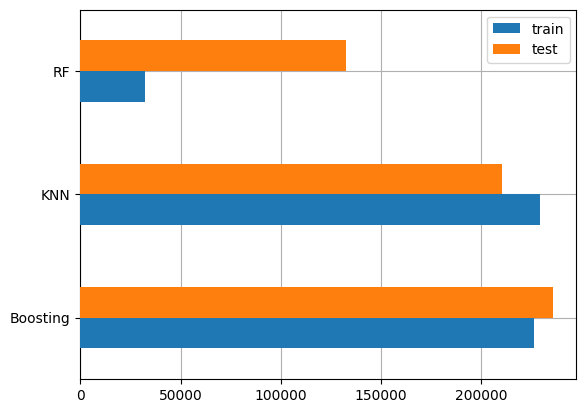

In [37]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan hasil evaluasi model menggunakan Mean Squared Error (MSE) pada data uji, dapat disimpulkan bahwa **Random Forest** merupakan algoritma dengan performa terbaik secara keseluruhan pada penelitian ini. Hal ini ditunjukkan oleh nilai MSE test Random Forest yang paling rendah dibandingkan KNN dan Boosting, yang menandakan bahwa secara rata-rata prediksi Random Forest memiliki kesalahan yang lebih kecil dan kemampuan generalisasi yang lebih baik terhadap data baru.

In [38]:
# Ambil 10 sample pertama dari X_test
prediksi = X_test.iloc[:10].copy()

# Buat dictionary untuk menyimpan y_true dan prediksi tiap model
pred_dict = {'y_true': y_test[:10]}

for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

# Tampilkan sebagai DataFrame
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
213,144990,139155.0,115338.7,110793.4
331,20999,37804.6,24054.9,37464.9
501,45490,59446.6,61693.2,64064.4
309,67288,59446.6,60126.1,64064.4
88,11990,33073.7,18007.9,37464.9
535,86990,91124.0,80188.0,81795.6
280,24990,39156.9,28269.2,37558.5
107,85990,98745.7,135662.5,133228.4
59,60990,83991.0,76581.1,67710.3
506,47490,45925.0,43380.2,39569.7


**Analisis Perbandingan Hasil Prediksi Model**

Berdasarkan hasil output perbandingan antara nilai y_true dan prediksi dari model KNN, Random Forest, dan Boosting, terlihat bahwa ketiga model menunjukkan perilaku yang berbeda ketika diuji pada sampel data individual.

* **KNN: Akurat pada kondisi tertentu**

  Pada beberapa kasus, KNN mampu memberikan prediksi yang paling mendekati nilai aktual. Contohnya pada index 213, ketika nilai y_true sebesar 144990, prediksi KNN yaitu 139155 memiliki selisih paling kecil dibandingkan dua model lainnya. Hal ini menunjukkan bahwa KNN dapat bekerja sangat baik ketika pola data di sekitar sampel cukup representatif.

* **Boosting: Menangkap pola spesifik**

  Boosting juga menunjukkan keunggulan pada sampel tertentu. Pada index 309, Boosting menghasilkan prediksi sebesar 64064.4 untuk nilai y_true 67288, menjadikannya model dengan prediksi terdekat pada sampel tersebut. Ini mengindikasikan bahwa Boosting mampu menangkap pola tertentu dalam data, meskipun performanya belum konsisten di seluruh sampel.

* **Random Forest: Stabil dan konsisten**
  Random Forest menonjol dari segi kestabilan prediksi. Pada index 331, prediksi Random Forest yaitu 24054.9 relatif dekat dengan nilai aktual 20999, sementara KNN dan Boosting menghasilkan selisih yang jauh lebih besar. Pola ini mencerminkan kemampuan Random Forest dalam menghindari kesalahan ekstrem.

* **Kasus error ekstrem dan dampaknya terhadap MSE**

  Pada beberapa sampel, seperti index 107, prediksi Random Forest dan Boosting jauh melampaui nilai y_true. Kesalahan ekstrem semacam ini berdampak signifikan terhadap nilai Mean Squared Error (MSE), karena MSE memberikan penalti yang lebih besar pada selisih prediksi yang besar.

**Kesimpulan**

Secara keseluruhan, KNN dan Boosting mampu unggul pada kondisi tertentu, namun Random Forest memberikan performa yang lebih stabil dan andal secara keseluruhan, yang tercermin dari nilai MSE data uji yang lebih rendah.